In [1]:
import numpy as np
from pylab import *

In [2]:
#1) Initialize parameters.
tmax = 1000
dt = 0.01

#1.1) Neuron/Network pairs.
c_m = 1e-6 # F/cm^2
v_th = -55 # mV
v_r = -75 # mV
g_l = 3e-7 # S/cm^2
e_l = v_r # mV
v_spike = 20 # mV

# Bursting parameters
alpha = 1 # Pa/ml
tau_p = 5 # s
k_in = 50 # ml/s
k_e = 500 # ml
beta = 3000 # Pa

# PIEZO channel parameters
g_s = 5e-7 # 5e-4 # S/cm^2
e_srev = 10 # mV
s = .00277 # 1/Pa
k_b = 106
m = 25
q = 1

400 800


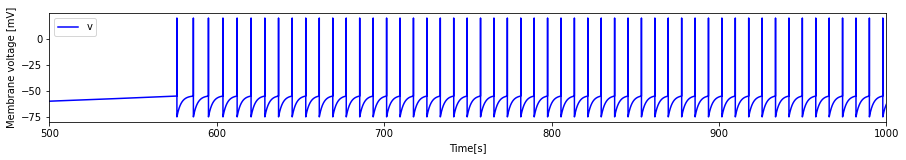

400 1000


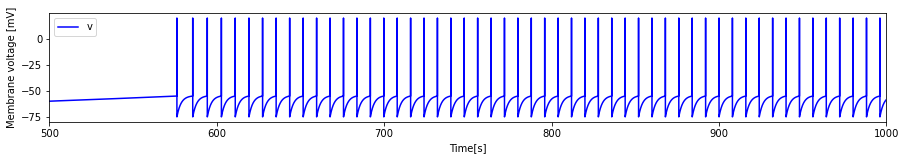

400 1200


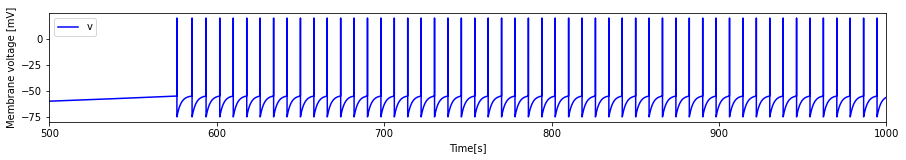

400 1400


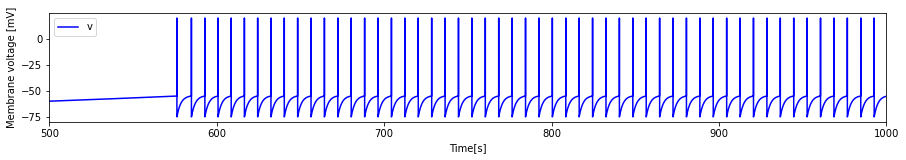

400 1600


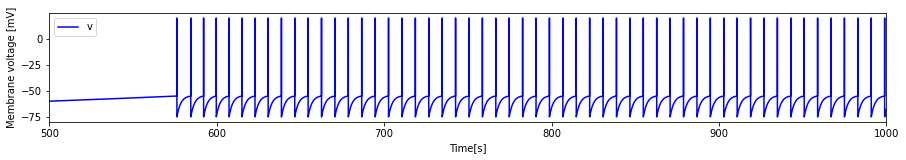

400 1800


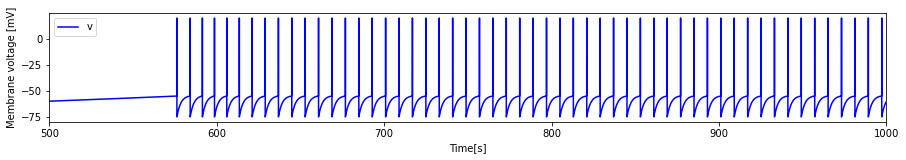

400 2000


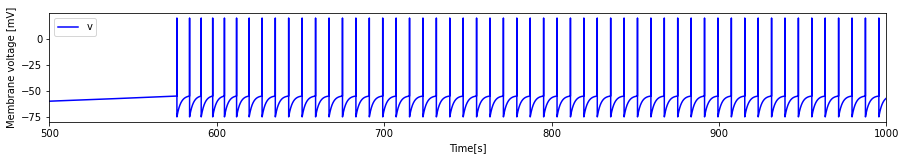

400 2200


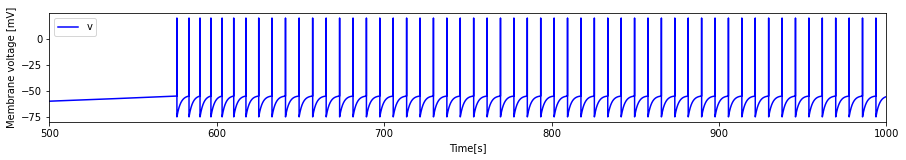

400 2400


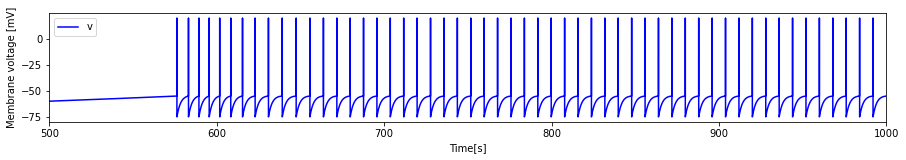

400 2600


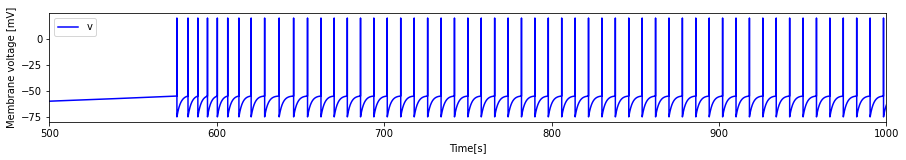

400 2800


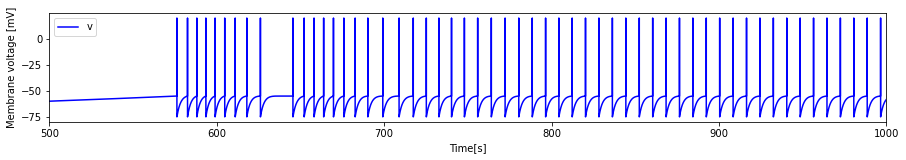

400 3000


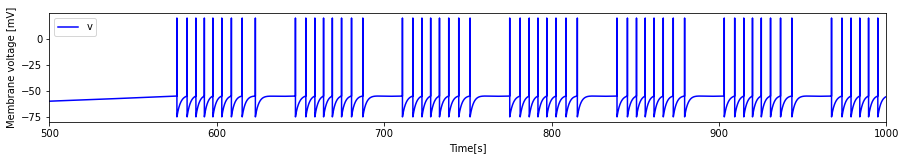

400 3200


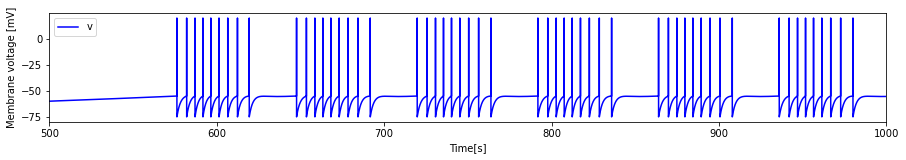

400 3400


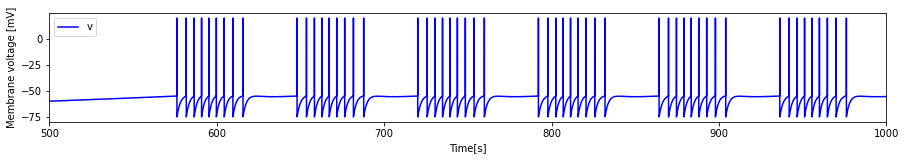

400 3600


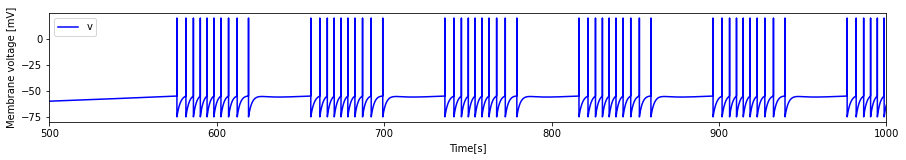

400 3800


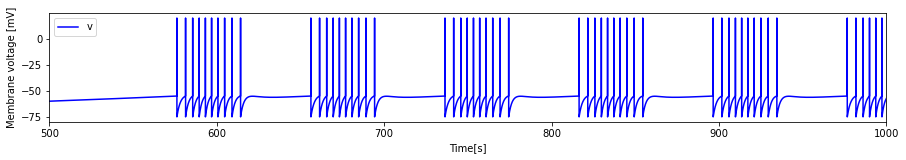

400 4000


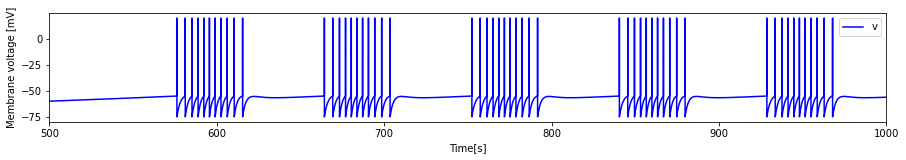

400 4200


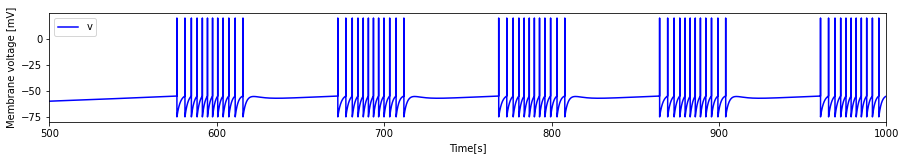

500 1000


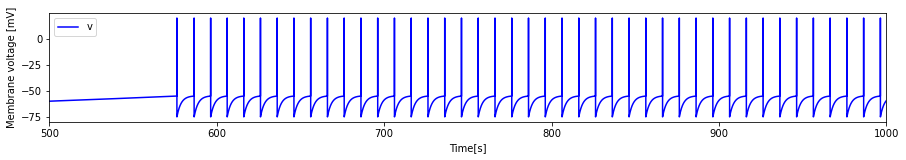

500 1250


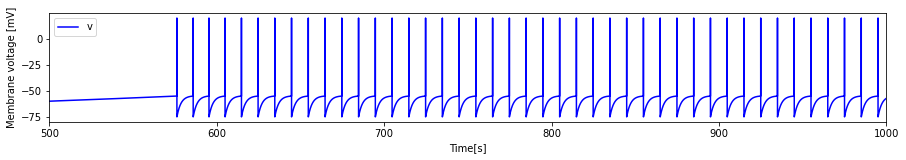

500 1500


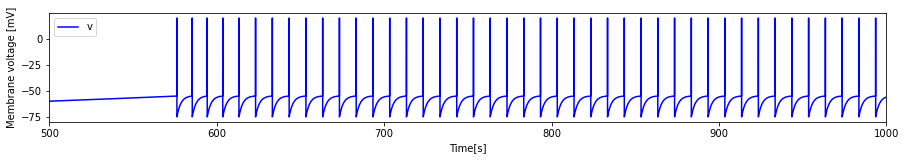

500 1750


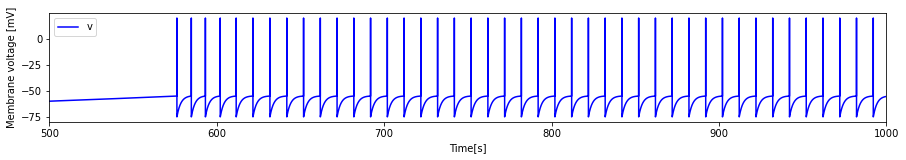

500 2000


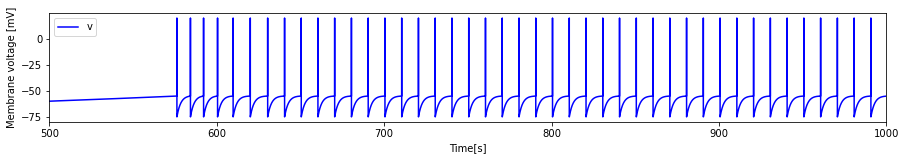

500 2250


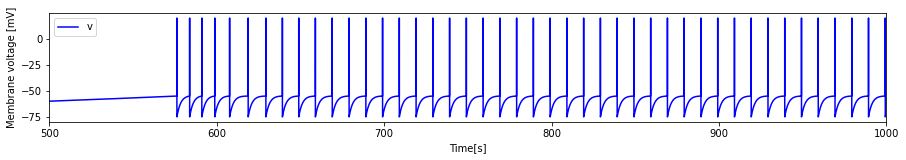

500 2500


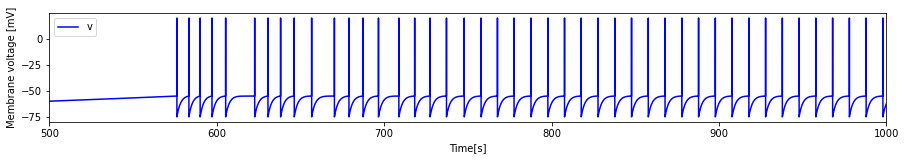

500 2750


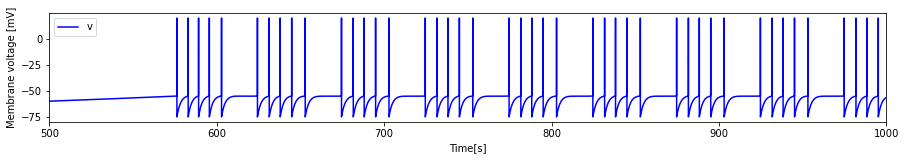

500 3000


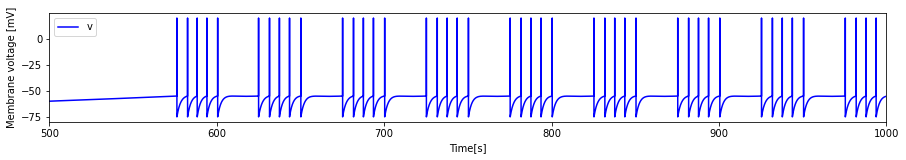

500 3250


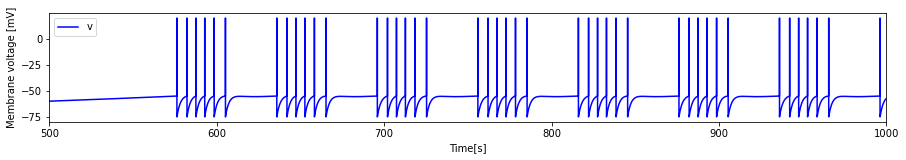

500 3500


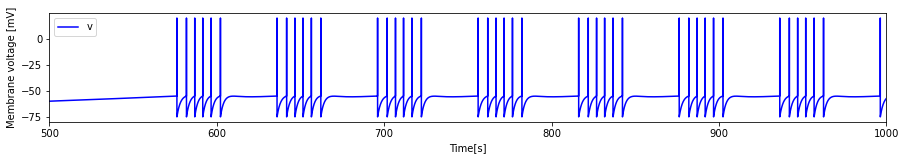

500 3750


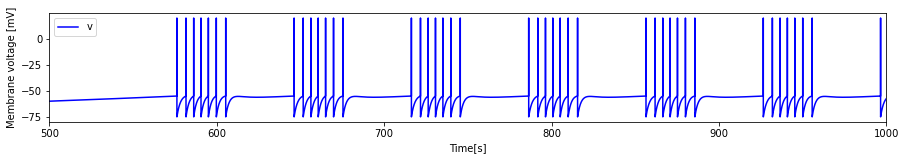

500 4000


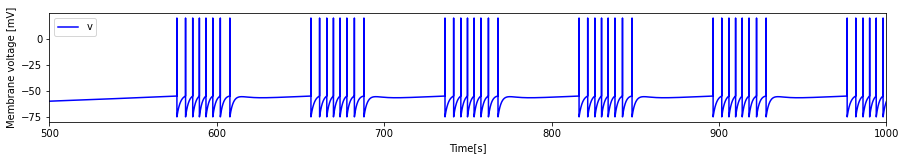

500 4250


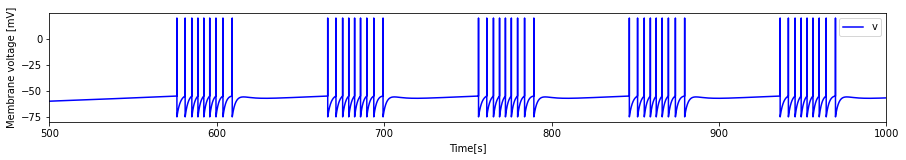

500 4500


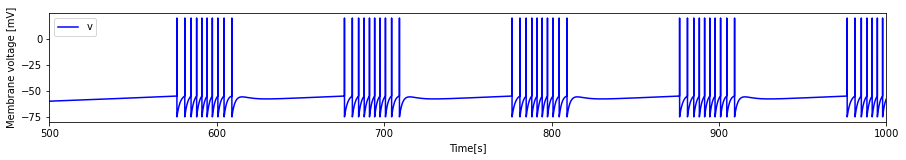

500 4750


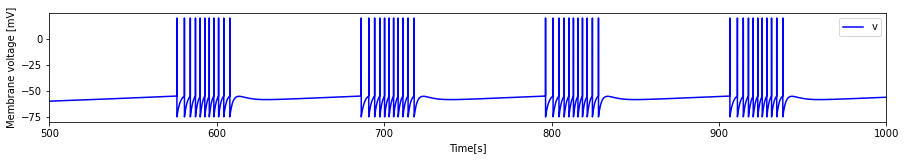

500 5000


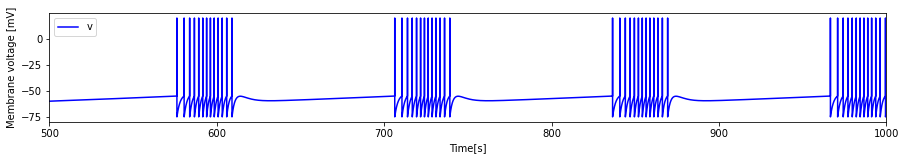

500 5250


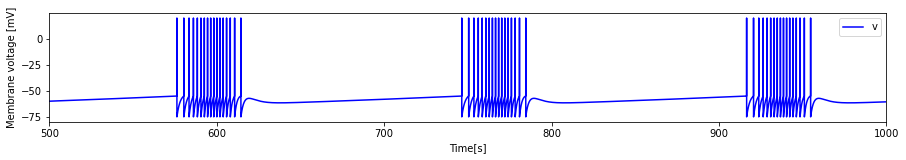

600 1200


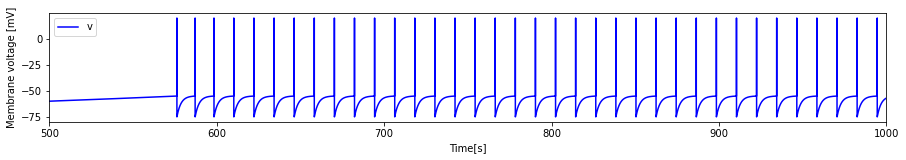

600 1500


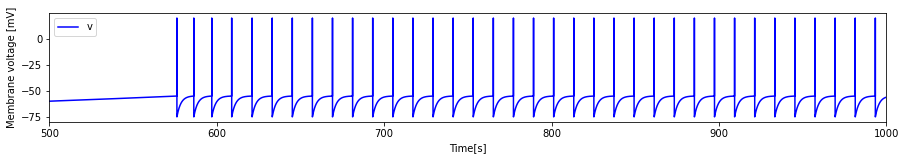

600 1800


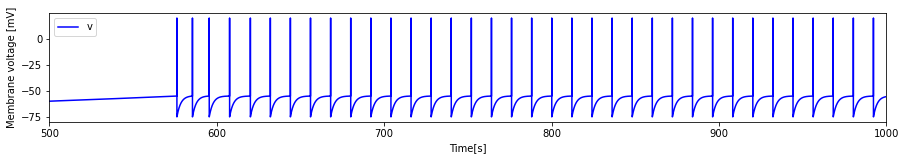

600 2100


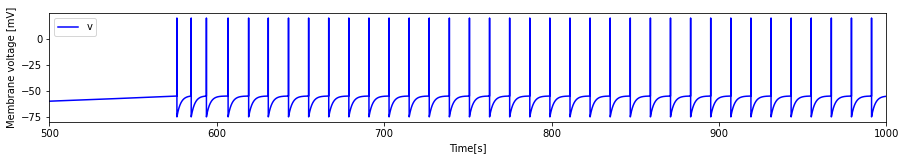

600 2400


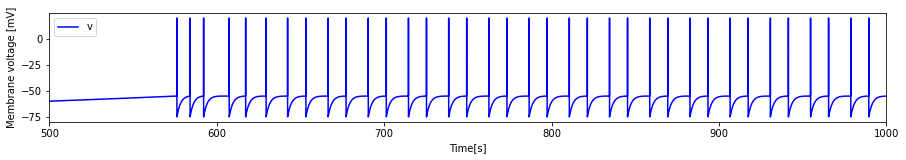

600 2700


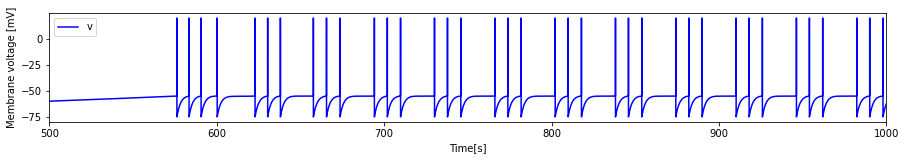

600 3000


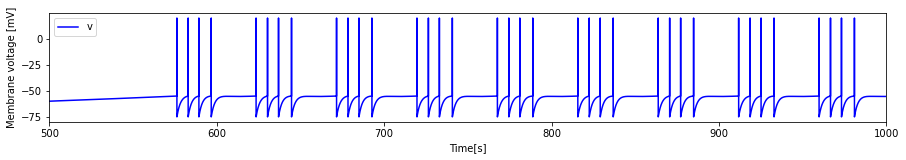

600 3300


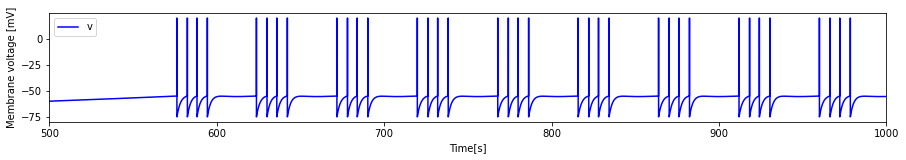

600 3600


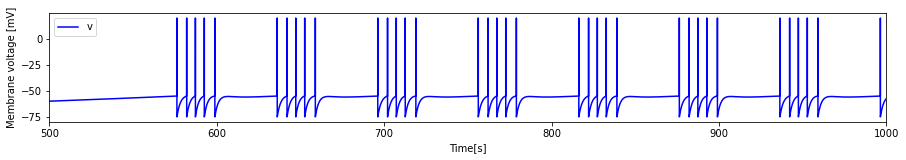

600 3900


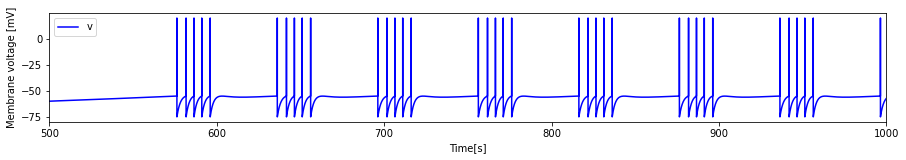

600 4200


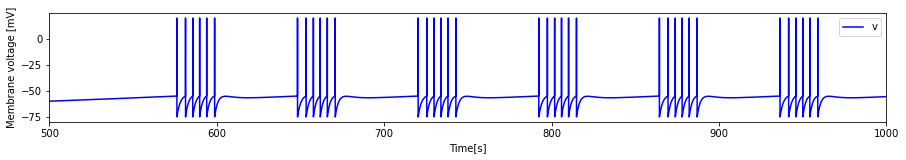

600 4500


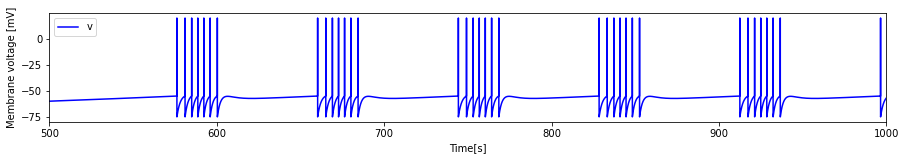

600 4800


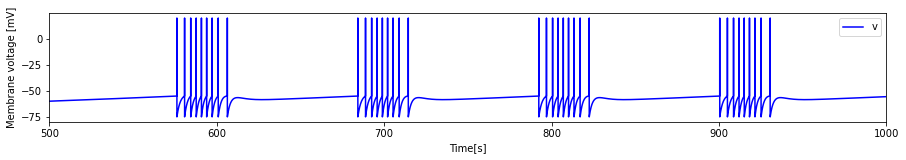

600 5100


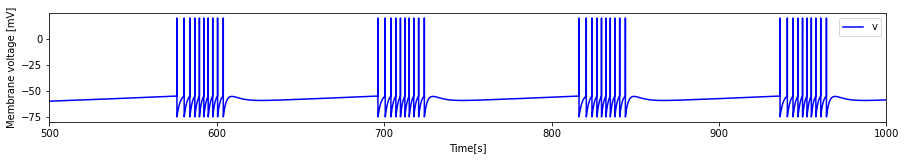

600 5400


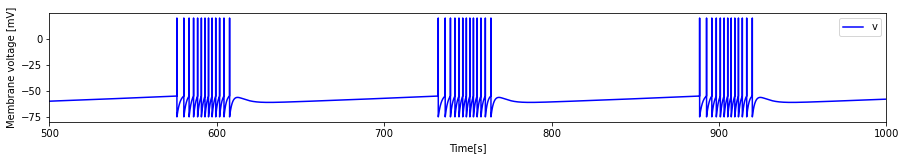

600 5700


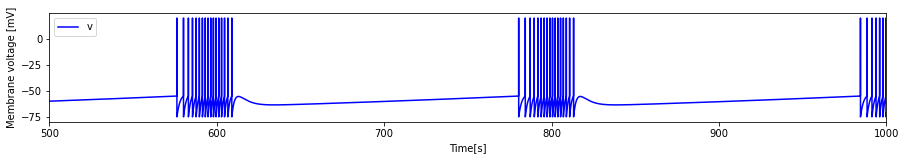

600 6000


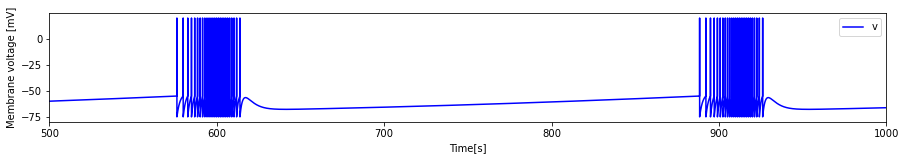

600 6300


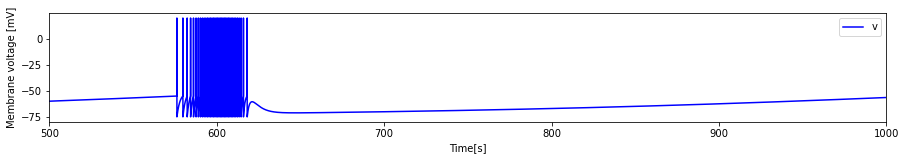

700 1400


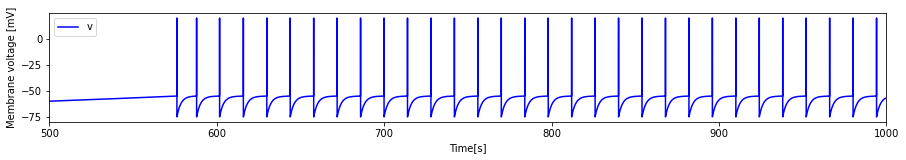

700 1750


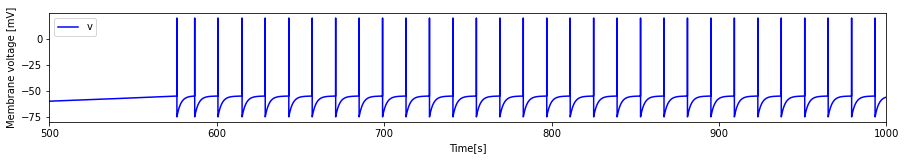

700 2100


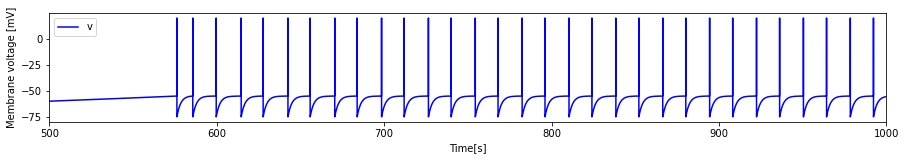

700 2450


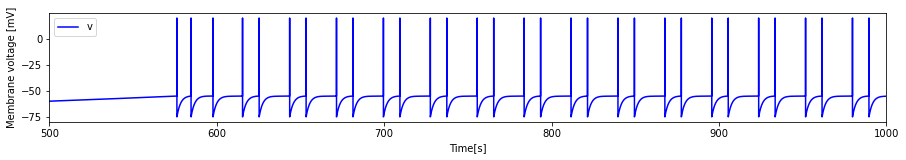

700 2800


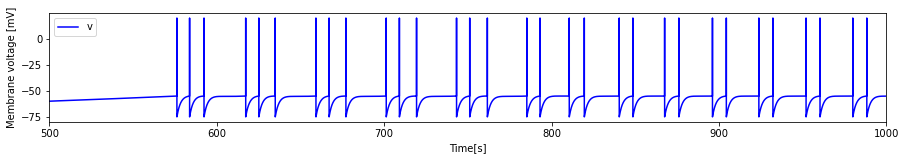

700 3150


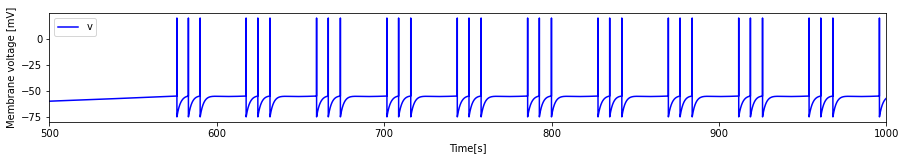

700 3500


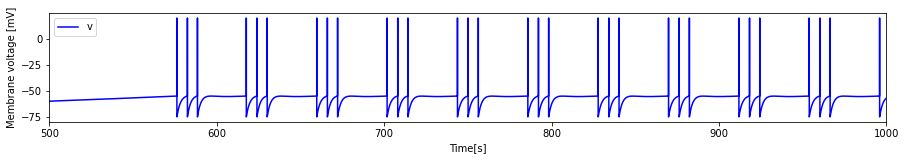

700 3850


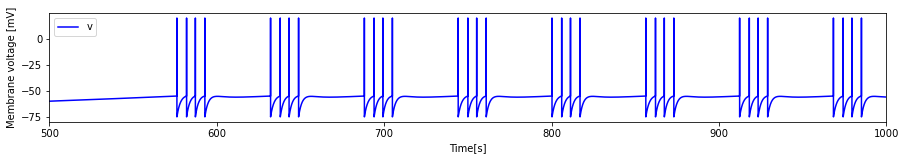

700 4200


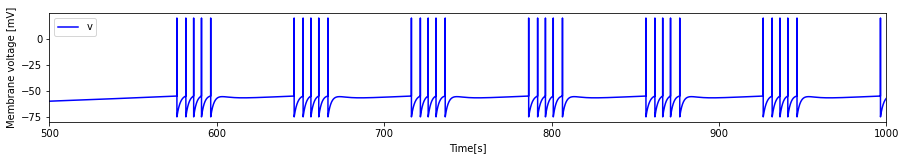

700 4550


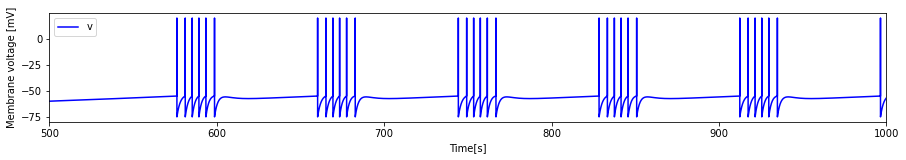

700 4900


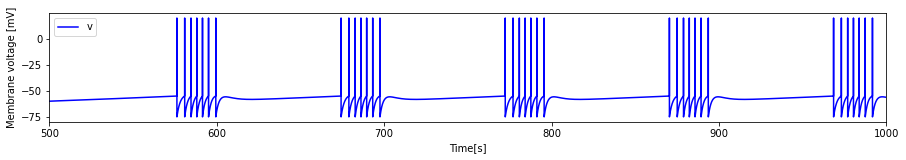

700 5250


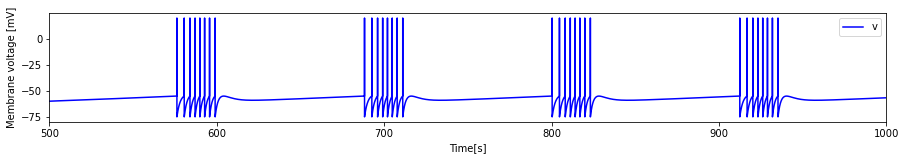

700 5600


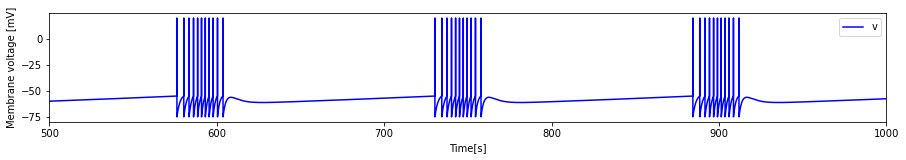

700 5950


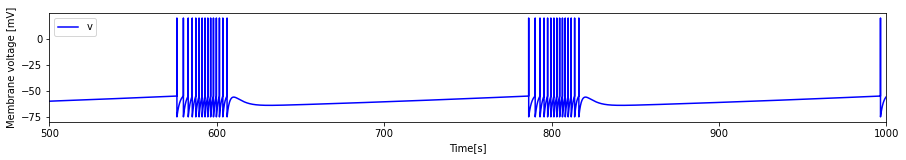

700 6300


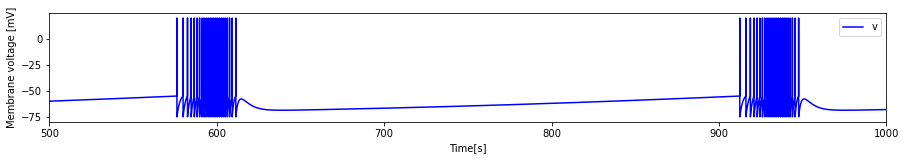

700 6650


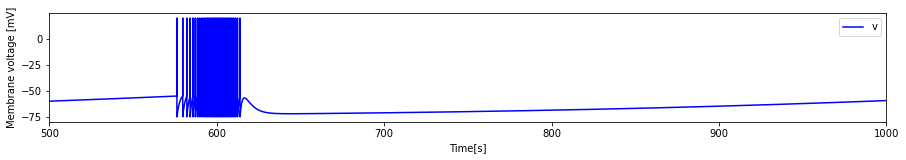

700 7000


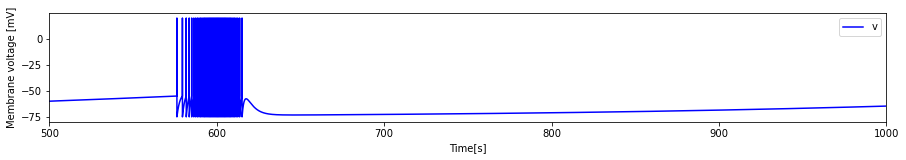

700 7350


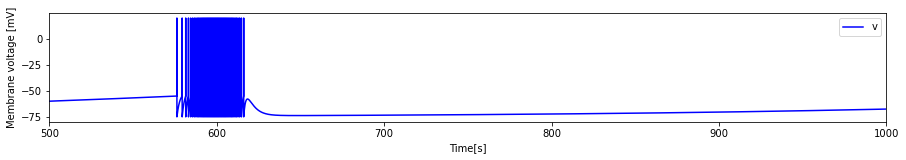

800 1600


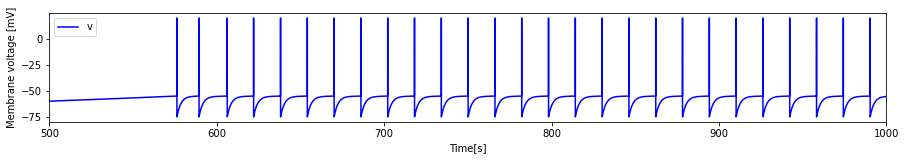

800 2000


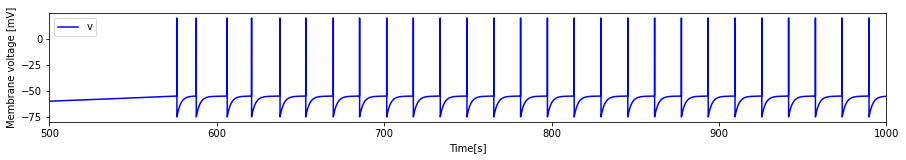

800 2400


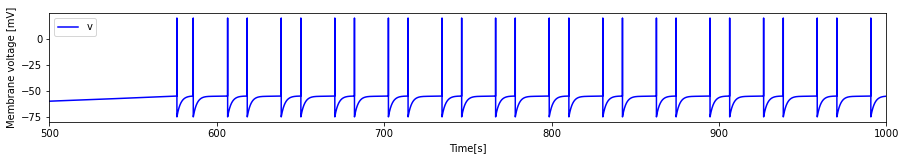

800 2800


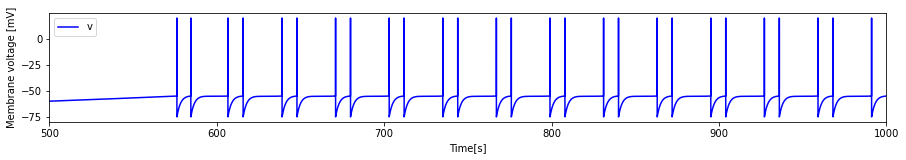

800 3200


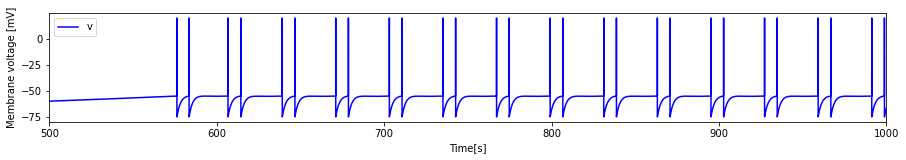

800 3600


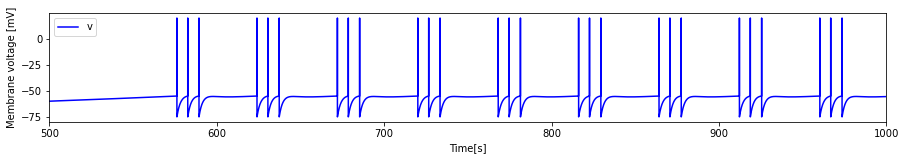

800 4000


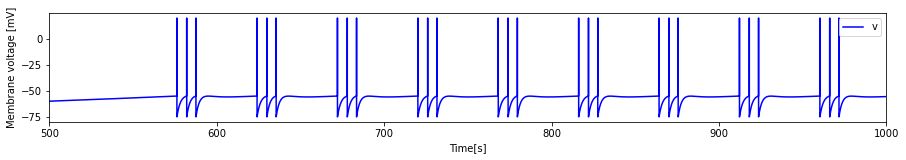

800 4400


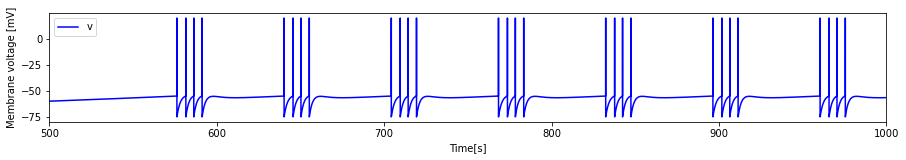

800 4800


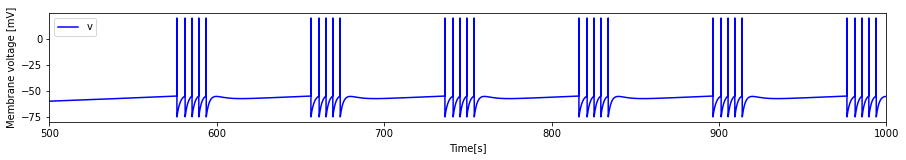

800 5200


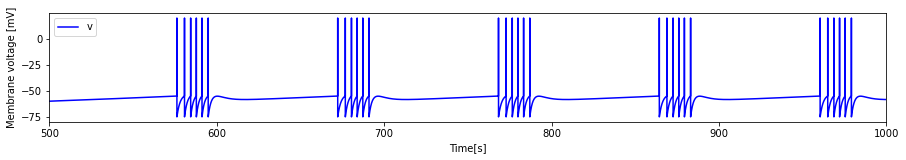

800 5600


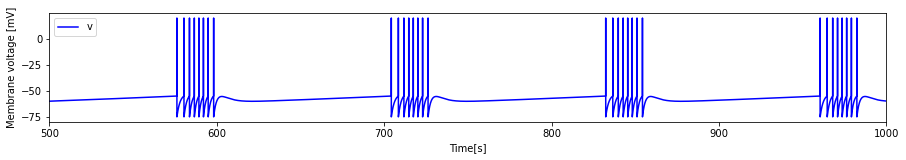

800 6000


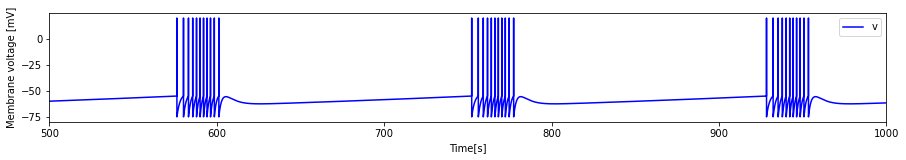

800 6400


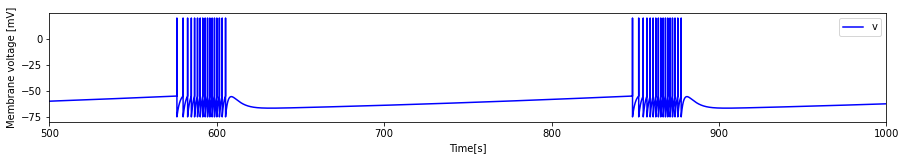

800 6800


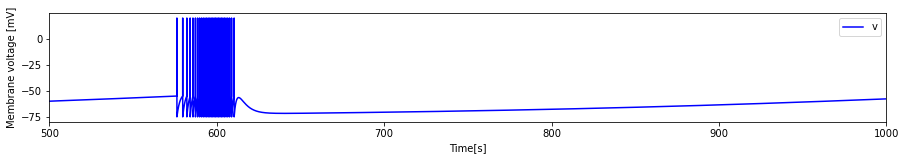

800 7200


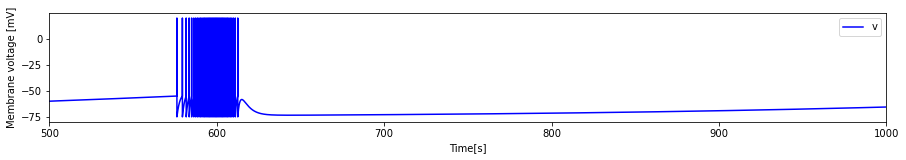

800 7600


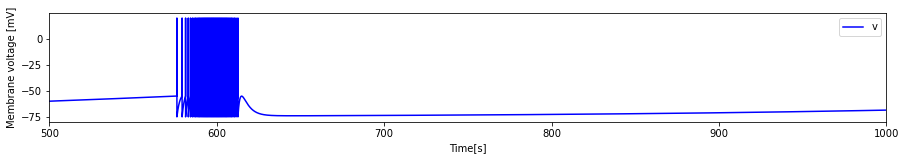

800 8000


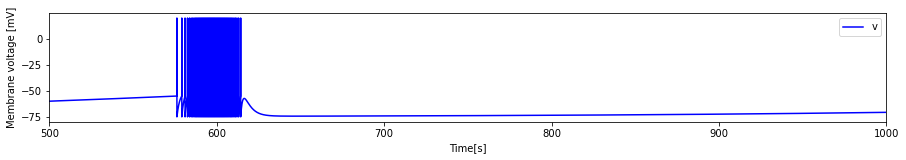

800 8400


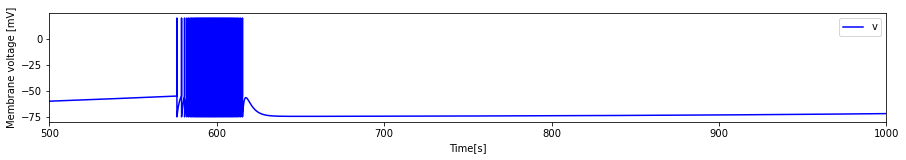

900 1800


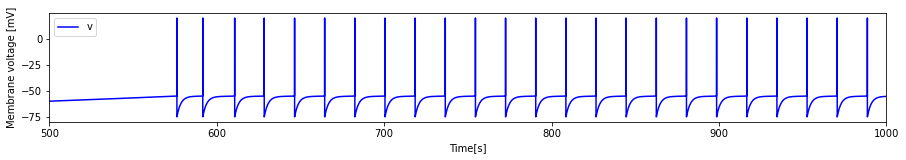

900 2250


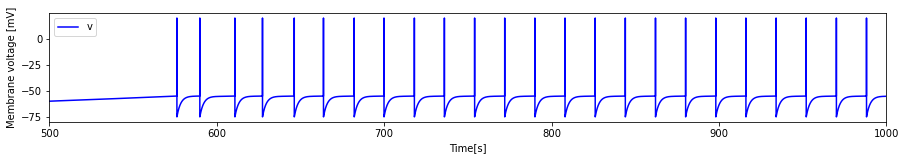

900 2700


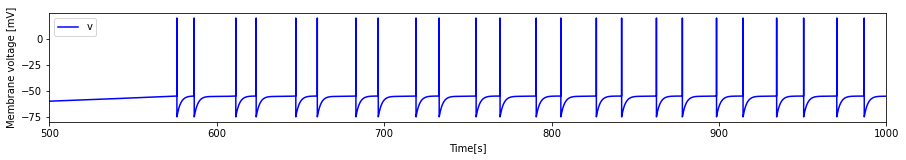

900 3150


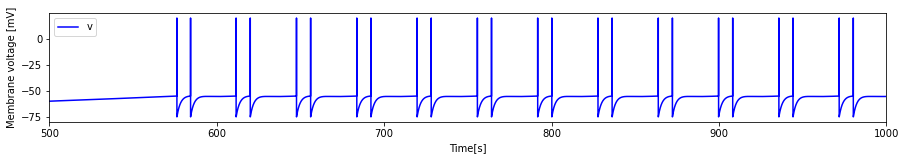

900 3600


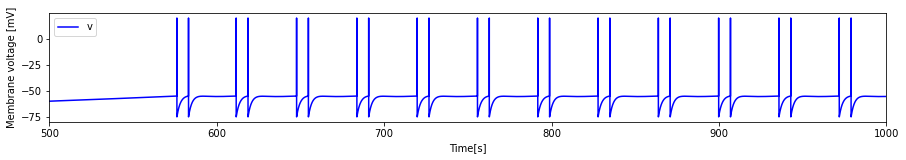

900 4050


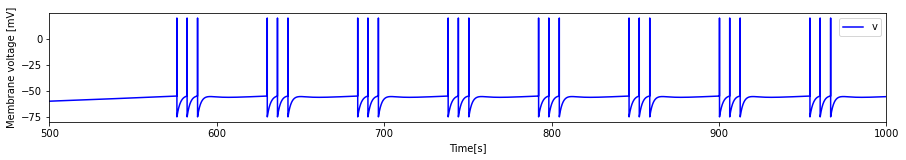

900 4500


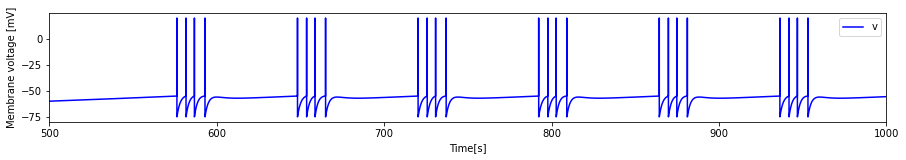

900 4950


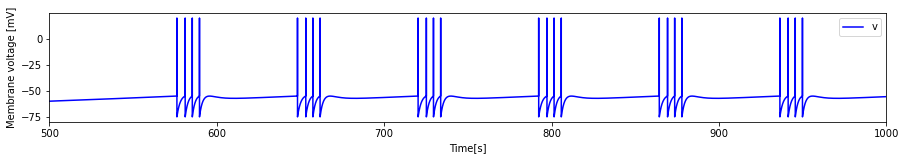

900 5400


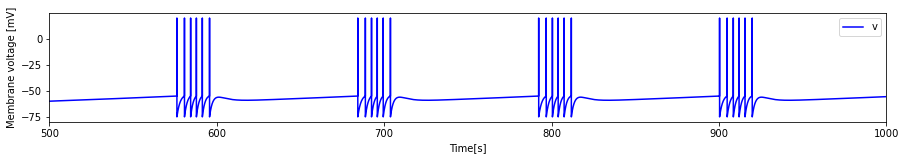

900 5850


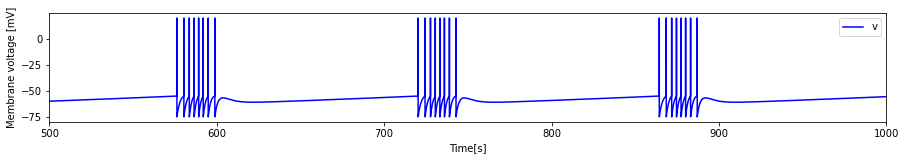

900 6300


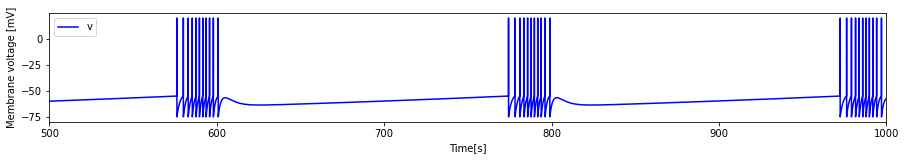

900 6750


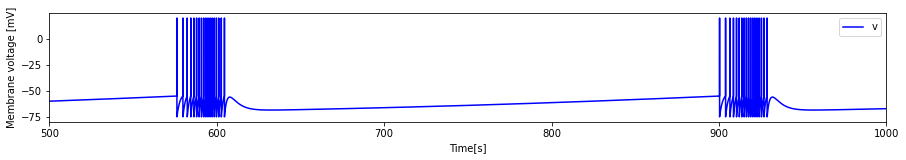

900 7200


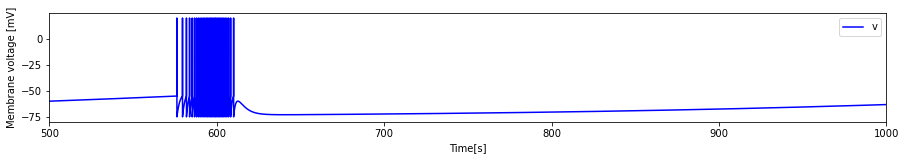

900 7650


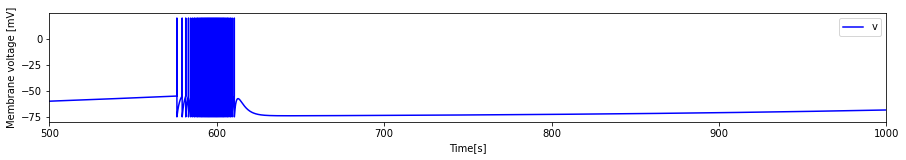

900 8100


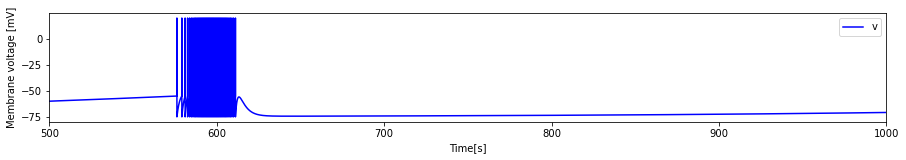

900 8550


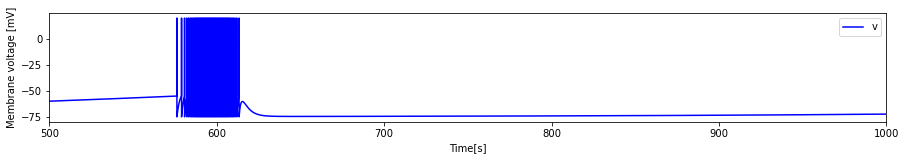

900 9000


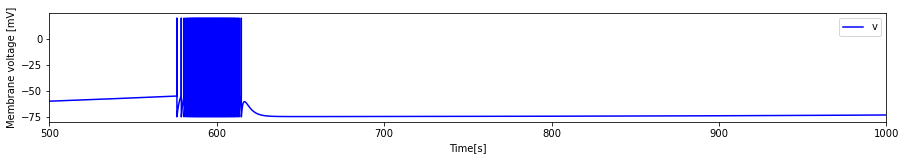

900 9450


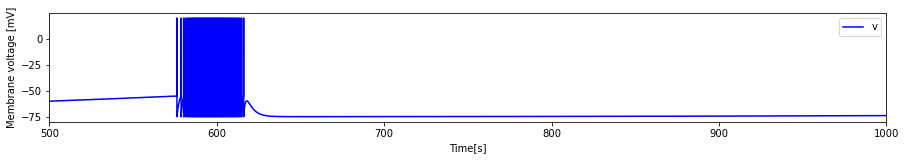

1000 2000


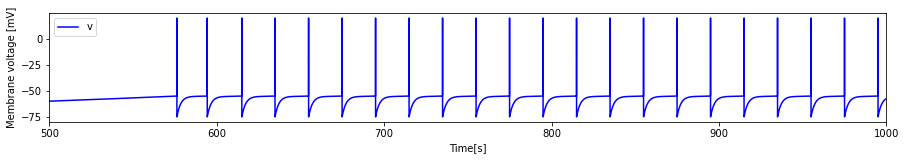

1000 2500


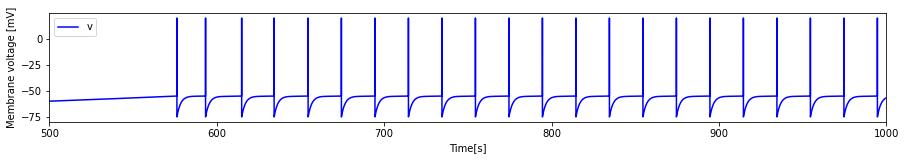

1000 3000


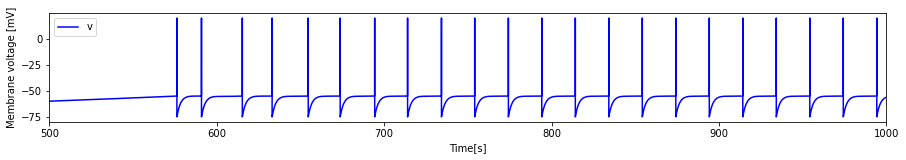

1000 3500


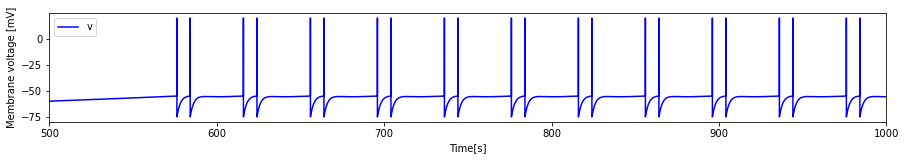

1000 4000


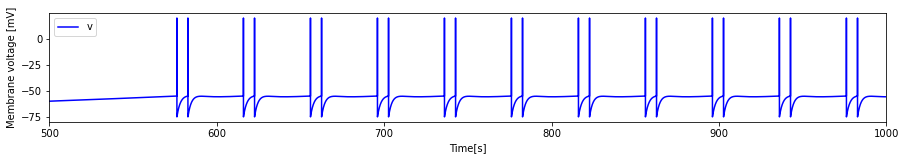

1000 4500


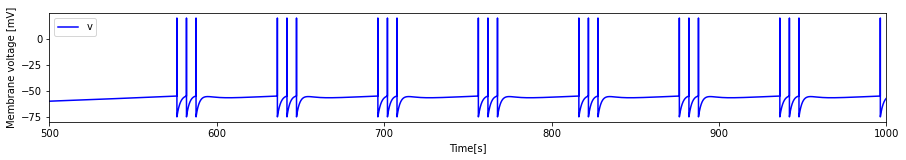

1000 5000


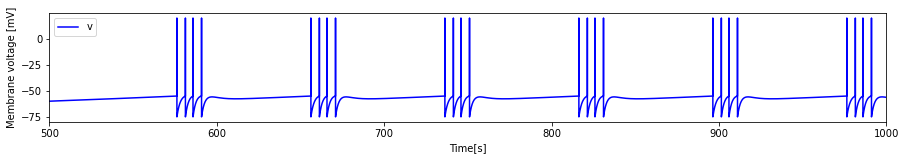

1000 5500


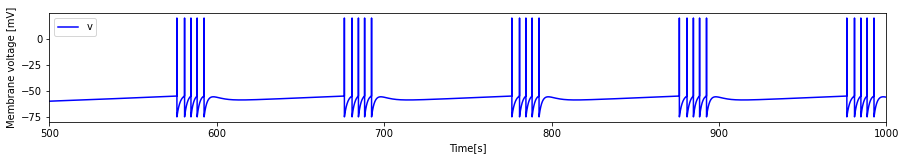

1000 6000


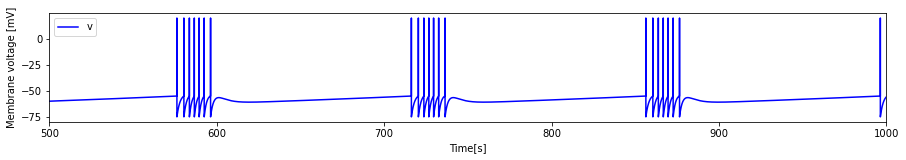

1000 6500


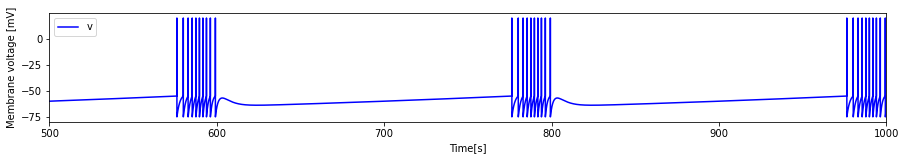

1000 7000


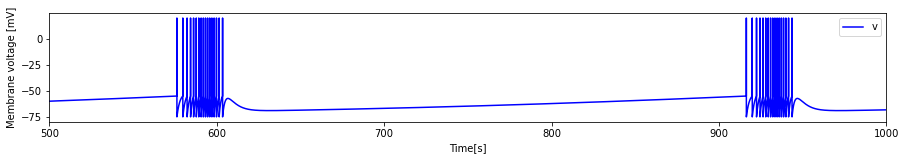

1000 7500


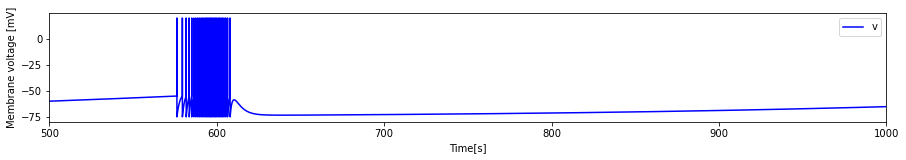

1000 8000


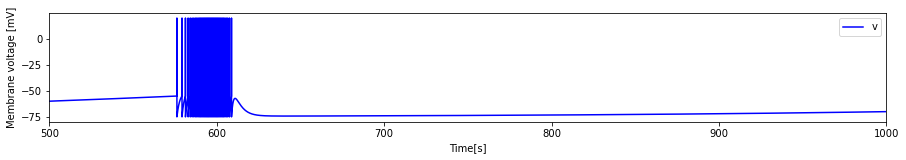

1000 8500


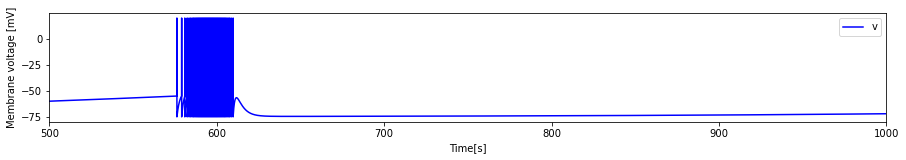

1000 9000


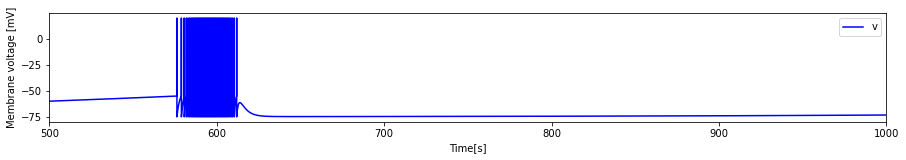

1000 9500


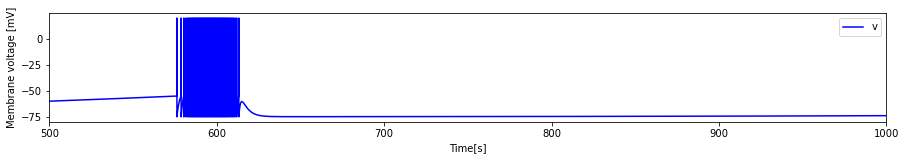

1000 10000


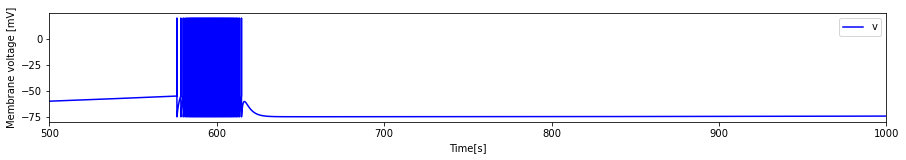

1000 10500


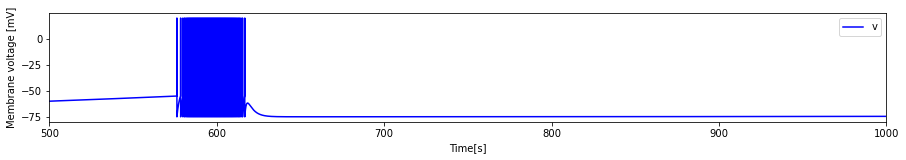

In [3]:
for k_e in range(400, 1100, 100):
    for beta in range(2*k_e, 11*k_e, k_e//2):
        print(k_e, beta)

        #2) Reserve memory
        
        T = int(np.ceil(tmax / dt))
        v = np.zeros(T)
        sigma_m = np.zeros(T)
        sigma_a = np.zeros(T)
        vol = np.zeros(T)
        i_s = np.zeros(T)
        
        
        spikes = []

        v[0] = v_r #Resting potential

        #3) For-loop over time.
        for t in np.arange(T-1):
            if v[t] < v_th:
                #3.1) Update DOE.
                i_s[t+1] = g_s / (1 + k_b * np.exp(- s * (sigma_m[t] / m) ** q)) * (v[t] - e_srev)
                i_l = g_l * (v[t] - e_l)
                # update membrane potential
                dv = 1 / c_m * (- i_l - i_s[t])
                v[t+1] = v[t] + dv*dt
                # update active stress
                dsigma_a = - sigma_a[t] / tau_p
                sigma_a[t+1] = sigma_a[t] + dsigma_a * dt
                # update vacuole volume
                dvol = k_in
                vol[t+1] = vol[t] + dvol * dt
            else:
                #3.2) Spike!
                v[t] = 20
                v[t+1] = v_r
                sigma_a[t+1] = sigma_a[t] + beta
                vol[t+1] = vol[t] - k_e
                i_s[t+1] = i_s[t]
                spikes.append(t*dt)
            # update muscle stress
            sigma_m[t+1] = alpha * vol[t+1] + sigma_a[t+1]
        
        
        #4) Plot voltage trace
        figure(figsize=(15,2))
        tvec = np.arange(0, tmax, dt)
        plot(tvec, v, 'b', label='v')
        xlabel('Time[s]')
        xlim(500, 1000)
        ylabel('Membrane voltage [mV]')
        legend()
        show()